# TODAY
* K-nearest neighbours algorithm
* Evaluation metrics
* Cross validation


# Classification with ScikitLearn
Scikit-learn includes many methods and functions for machine learning.

* We have a set of features to describe the examples, and we want to assign a "class" to our examples.

**Example**: *We have some samples of data whose features belong to the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.*

**Metrics for evaluating Machine Learning models**: accuracy, precision, recall, F-measure.


In [1]:
import sklearn
from sklearn import datasets #import a built-in dataset from scikit-learn
import numpy as np

wine_dataset = datasets.load_wine() #Load wine dataset
print(wine_dataset.keys()) # print the keys of a "wine_dataset" object

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [2]:
print(wine_dataset["DESCR"]) #Print the description of the dataset

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [3]:
# Access the data, targets, and other information in the dataset.
X = wine_dataset.data
y = wine_dataset.target
feature_names = wine_dataset.feature_names

In [4]:
print(X.shape) # Print the shape of the array X

(178, 13)


The output in this case might be "(178, 13)," which indicates that there are 178 rows and 13 columns in the data represented by "X." 178: is the number of samples in the wine dataset. 13: is the number of features in a single sample.

In [5]:
# Very important!!!!! Split the entire dataset into (a) training set, and (b) test set.
from sklearn.model_selection import train_test_split

# In this case, with a proportion of 25% of the data assigned to the test set.
# The "random_state" argument is used to control the reproducibility of the random split.
# The value "24" in this case is just an arbitrary number and could be replaced with any other integer.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [ ]:
# Very important!!!!! Split the training set into (a) training set, and (b) validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=32)

In [ ]:
# Import the "KNeighborsClassifier" class from the "neighbors" module of the scikit-learn library.
# k-Nearest Neighbors, a machine learning algorithm used for classification problems.
# This classifier assigns a class to a data point based on the classes of the data points closest to it in the training set.

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n_neighbors = 25 # Specify the desired number of neighbors
model = KNeighborsClassifier(n_neighbors) # The model is initialized to use 25 neighbors in the classification phase

In [ ]:
# Fit model to data: the model will be trained using the training data X_train and the labels y_train.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
# Validation
# "model" represents the K-Nearest Neighbors model that we trained earlier.
# predict() is a method to make predictions using the trained model.
# The array pred_val will contain the model's predictions for the validation data (X_val).

pred_val = model.predict(X_val)

In [ ]:
pred_val

array([2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1])

### Metrics:
# Confusion Matrix for Binary Classification
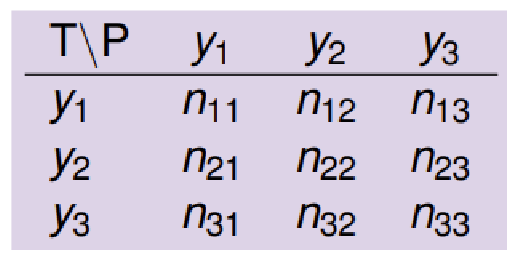


# Accuracy:
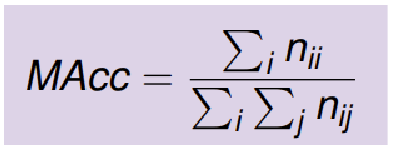
# Precision and Recall:
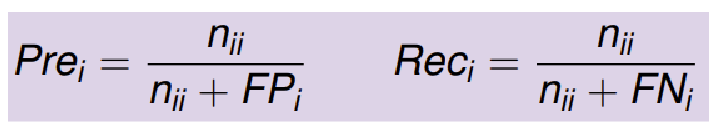



In [ ]:
# Calculate accuracy
# "pred_val == y_val": This expression creates a boolean array where each element
    # is True if the prediction matches the true label for the corresponding observation in the validation data, otherwise it is False.
# "np.mean(...)" calculates the fraction of "True" elements in a boolean array, thus representing the percentage of correct predictions out of the total predictions.
# y_val: Ground truth for validation data. Represents the true labels in the validation data.

accuracy = np.mean(pred_val == y_val)
print(f"Accuracy on validation set is: {accuracy}")

Accuracy on validation set is: 0.7058823529411765


In [ ]:
# Calculating the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calcolare la matrice di confusione sulla base delle etichette reali "y_val" e delle previsioni del modello "pred_val"
print("The total amount of data predicted as 0:", sum(pred_val==0))
print("The total amount of data that is 0 in reality:", sum(y_val==0))
print("The total amount of data predicted as 0:", sum(pred_val==1))
print("The total amount of data that is 0 in reality:", sum(y_val==1))
print("The total amount of data predicted as 0:", sum(pred_val==2))
print("The total amount of data that is 0 in reality:", sum(y_val==2))
cm = confusion_matrix(y_val, pred_val)

The total amount of data predicted as 0: 9
The total amount of data that is 0 in reality: 7
The total amount of data predicted as 0: 9
The total amount of data that is 0 in reality: 14
The total amount of data predicted as 0: 16
The total amount of data that is 0 in reality: 13


In [ ]:
cm
# Note that the sum of each row corresponds to the ground truth.
# Note that the sum of each column represents the total predictions made by the model for each class.

array([[ 6,  0,  1],
       [ 1,  8,  5],
       [ 2,  1, 10]])

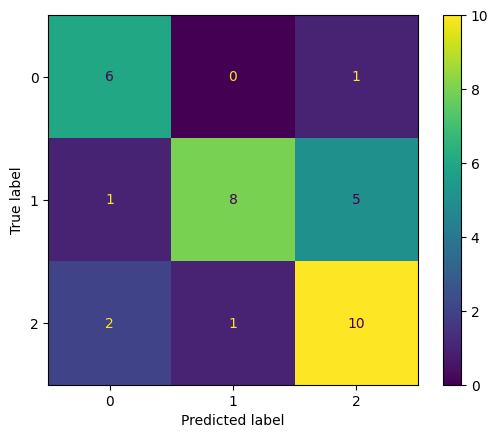

In [ ]:
# How to graphically represent the confusion matrix?
ConfusionMatrixDisplay(cm).plot()
# a confusion matrix plot using the default settings

In [ ]:
# Can we modify the graph settings?
help(ConfusionMatrixDisplay)
# Read the following output at home.

In [ ]:
# Calculate accuracy, recall, and precision with scikit-learn
accuracy = sklearn.metrics.accuracy_score(y_val, pred_val)
recall = sklearn.metrics.recall_score(y_val, pred_val, average="macro")
precision = sklearn.metrics.precision_score(y_val, pred_val, average="macro")

# macro: This parameter specifies how to calculate recall in the case of multiclass problems.
# The "macro" option calculates the recall for each class and returns the unweighted average of these values.
# It is useful when you want to obtain a measure of overall recall that considers all classes equally.
# IMPORTANT: "Macro" is a valid choice when we want a balanced evaluation metric for imbalanced classification problems.

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7058823529411765
Precision: 0.7268518518518517
Recall: 0.7326007326007326


## Exercise

1. For the wine dataset and the k-NN method, write a code to select the best hyperparameter based on validation performance.

2. A better way of performing model validation is applying k-fold cross validation. See `sklearn.model_selection.cross_val_score` and `sklearn.model_selection.ShuffleSplit` to implement k-fold cross validation when k=2 and k=3.
